In [1]:
def gbm(n_years = 10, n_scenarios = 1000, mu = 0.07, sigma = 0.15, steps_per_year = 12, s_0 = 100.0):
    """
    Evolution of Geometric Brownian Motion trajectories, such as for Stock Prices through Monte Carlo
    :param n_years: The number of years to generate data for
    :param n_paths: The number of scenarios
    :param mu: The annualized drift, e.g. Market Return
    :param sigma: The annualized volatility
    :param steps_per_year: granularity of the simulation
    :param s_0: initial stock price
    :return: a numpy array of n_paths columns and n_years*steps_per_year rows
    """
    import numpy as np
    import pandas as pd
    dt = 1/steps_per_year 
    n_steps = int(n_years*steps_per_year)
    rets= np.random.normal(size=(n_steps, n_scenarios), loc = (1+mu*dt), scale = sigma*np.sqrt(dt)) 
    # Random numbbers of rows n_steps and columns n_scenarios
    # loc is the mean of the normal distribution. using it in np.random.normal. Same as scale which is sigm
    # Using 1+mu*dt because we are using the growth factor of returns. which is 1+ returns
    
    rets = pd.DataFrame(rets)
    prices = s_0*(rets).cumprod()
    return prices
    

In [2]:
import ipywidgets as widgets

In [4]:
def squareit(n):
    return n*n

In [5]:
widgets.interact(squareit, n=(0, 100))

interactive(children=(IntSlider(value=50, description='n'), Output()), _dom_classes=('widget-interact',))

<function __main__.squareit(n)>

<Axes: >

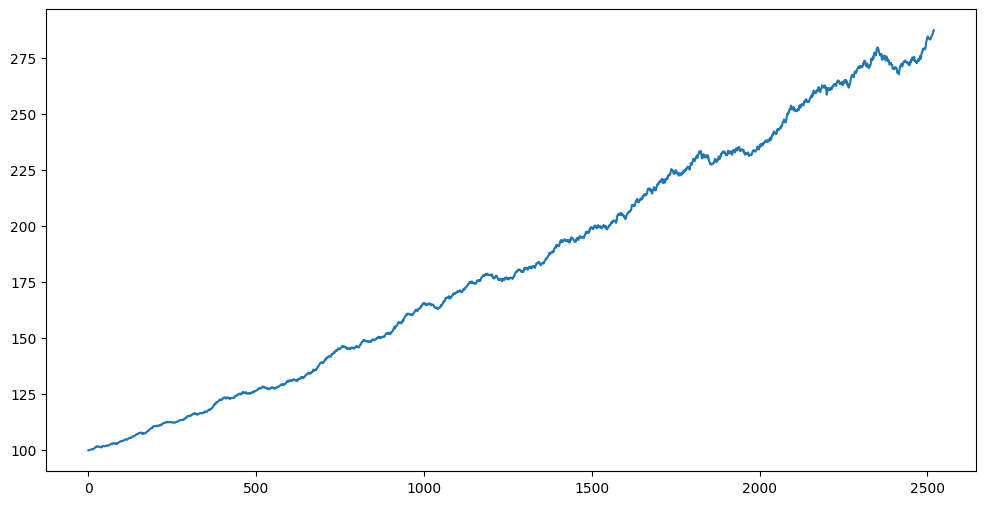

In [53]:
prices = gbm(10, n_scenarios=1000, mu= .111,steps_per_year =252, sigma=0.5)
prices.mean(axis = 1).plot(legend=False, figsize=(12,6))

In [34]:
prices

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,97.938431,100.574057,96.067841,98.231332,98.234135,95.618062,95.467931,106.391274,102.488591,100.149799,...,95.399509,101.378548,99.286318,99.252116,104.373497,96.067684,103.474216,107.399793,103.505266,104.151235
1,99.499351,94.132881,100.081633,97.942501,100.498506,95.171697,96.993622,110.125403,104.746759,101.450804,...,97.358942,97.681337,92.202984,97.279658,101.689340,98.251580,107.572121,114.947536,99.339336,98.813285
2,95.813593,89.622091,96.976686,96.985498,102.981377,92.891984,96.163967,111.906216,112.441696,96.997945,...,98.386677,95.539917,89.246294,96.010305,108.632996,99.438705,108.865119,117.529855,103.356339,91.202141
3,102.697170,84.906715,102.470608,103.819279,99.874034,89.234192,94.215396,110.467894,112.417498,102.540611,...,104.201346,93.771082,81.105584,98.896778,113.645015,103.054680,106.531097,125.108154,105.846931,95.496996
4,98.364774,84.912866,101.420439,98.789120,100.295668,92.636395,90.507028,115.495119,101.249844,101.129530,...,104.091562,92.280747,82.652664,99.125750,118.072494,109.973342,106.753380,118.920122,110.008358,103.978858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,154.685486,48.709075,101.295965,85.691811,111.265190,204.131016,81.637772,225.083690,173.882470,412.037560,...,174.150204,63.339941,123.121672,74.307531,59.892756,133.115815,189.014729,164.924998,92.437433,66.865257
116,149.228082,46.659620,98.600775,83.929470,112.915032,213.185696,79.831917,211.613067,171.534156,401.261356,...,177.928242,67.949426,124.309041,77.477672,61.143131,126.914171,184.537309,167.084129,97.122476,62.396906
117,145.052379,43.809382,95.156535,82.055235,115.316058,188.676828,76.390374,218.560976,172.828854,395.491917,...,175.119422,62.984222,119.357546,75.966806,61.959046,130.779102,175.192887,167.344618,96.785609,61.804271
118,146.394469,42.444122,107.081645,85.567066,108.778141,200.696317,74.608655,206.444102,181.002209,378.287402,...,180.675866,64.355447,117.332225,72.726195,61.690202,138.553918,164.999291,160.502429,100.578882,64.042419


In [33]:
%timeit gbm(5, n_scenarios=1000)

2.89 ms ± 97.8 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
